***Problem Statement :***
- Implement a KNN model to classify the animals in to categorie.

In [32]:
# Importing usefull libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import plotly.express as pex
import networkx as nx
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

# Ignoring anoying warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df_zoo = pd.read_csv("Zoo.csv")

# Showing first 5 rows from dataset
df_zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
# Total rows & columns in dataset
df_zoo.shape

(101, 18)

In [4]:
# Checking null values present in dataset
df_zoo.isnull().any().any()

False

In [5]:
# Information about dataset
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
# Checking unique values in "animal name" column
df_zoo['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [7]:
# Checking additional stats from dataset
df_zoo.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [8]:
# Understanding the correlation between each columns
corr = df_zoo.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.00,-0.43,-0.82,0.88,-0.20,-0.47,-0.15,0.49,0.19,0.44,-0.10,-0.28,0.39,0.05,0.21,0.46,-0.56
feathers,-0.43,1.00,0.42,-0.41,0.66,-0.06,-0.10,-0.61,0.23,0.25,-0.15,-0.22,-0.21,0.29,0.03,-0.14,-0.20
eggs,-0.82,0.42,1.00,-0.94,0.38,0.38,0.01,-0.64,-0.34,-0.38,0.10,0.16,-0.22,-0.22,-0.16,-0.51,0.66
milk,0.88,-0.41,-0.94,1.00,-0.37,-0.36,-0.03,0.63,0.38,0.42,-0.24,-0.16,0.21,0.21,0.16,0.57,-0.72
airborne,-0.20,0.66,0.38,-0.37,1.00,-0.17,-0.30,-0.59,-0.10,0.29,0.01,-0.25,0.04,0.01,0.06,-0.35,0.02
aquatic,-0.47,-0.06,0.38,-0.36,-0.17,1.00,0.38,0.05,0.02,-0.64,0.09,0.60,-0.36,-0.03,-0.22,-0.11,0.33
predator,-0.15,-0.10,0.01,-0.03,-0.30,0.38,1.00,0.13,0.05,-0.26,0.12,0.19,-0.10,0.02,-0.31,0.14,0.06
toothed,0.49,-0.61,-0.64,0.63,-0.59,0.05,0.13,1.00,0.58,-0.07,-0.06,0.36,-0.19,0.31,0.07,0.34,-0.47
backbone,0.19,0.23,-0.34,0.38,-0.10,0.02,0.05,0.58,1.00,0.21,-0.25,0.21,-0.43,0.73,0.10,0.36,-0.83
breathes,0.44,0.25,-0.38,0.42,0.29,-0.64,-0.26,-0.07,0.21,1.00,-0.12,-0.62,0.37,0.09,0.12,0.20,-0.52


<AxesSubplot: >

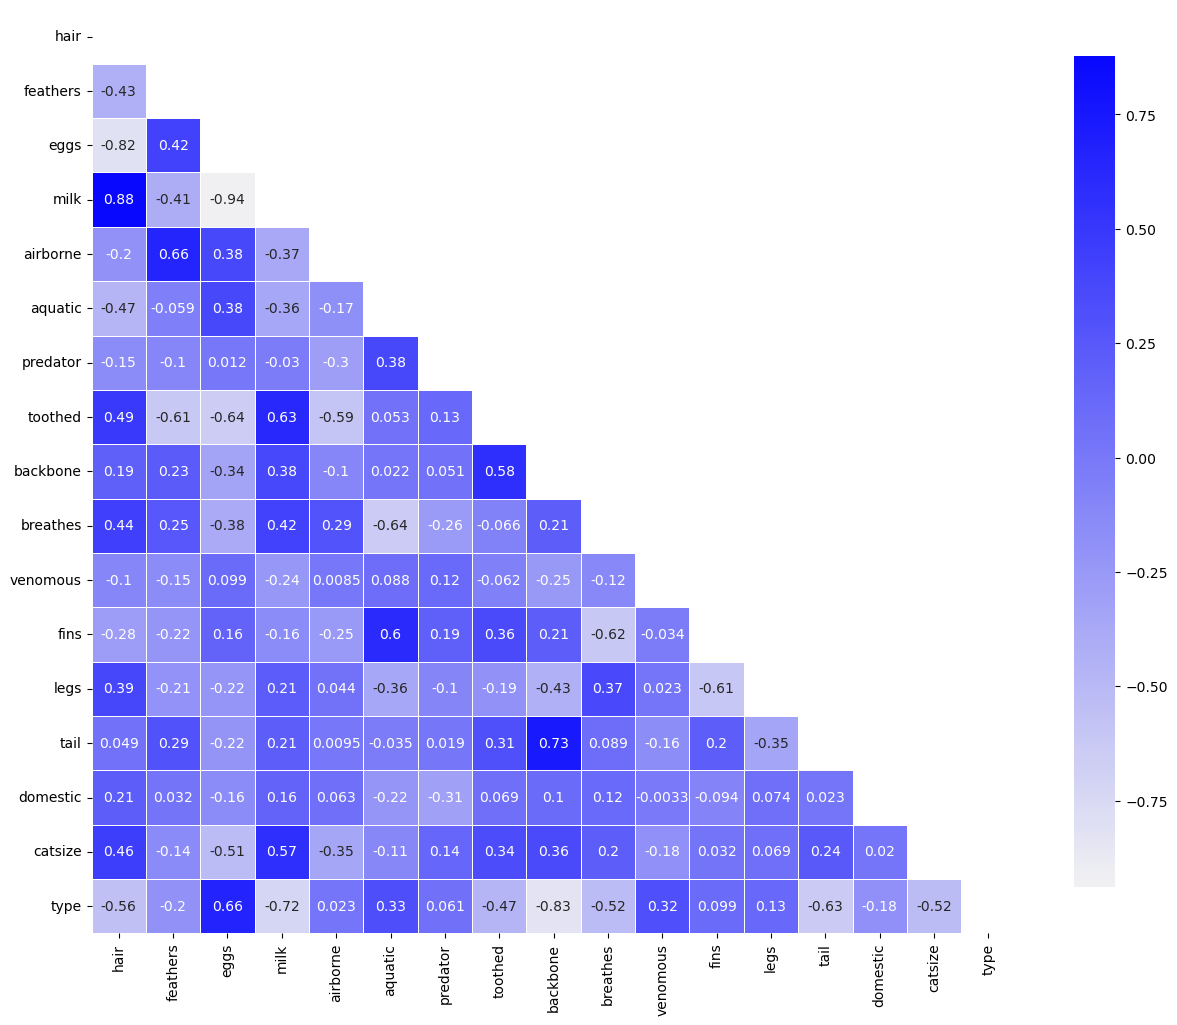

In [9]:
# Understanding correlation by using heatmap
corr = df_zoo.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.light_palette('blue', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

**Plotting the histogram of each numerical variable (in this case, all features), the main idea here is to visualize the data distribution for each feature. This method can bring fast insights as :**
- Check the kind of each feature distribution
- Check data symmetry
- Verify features frequency
- Identify outliers

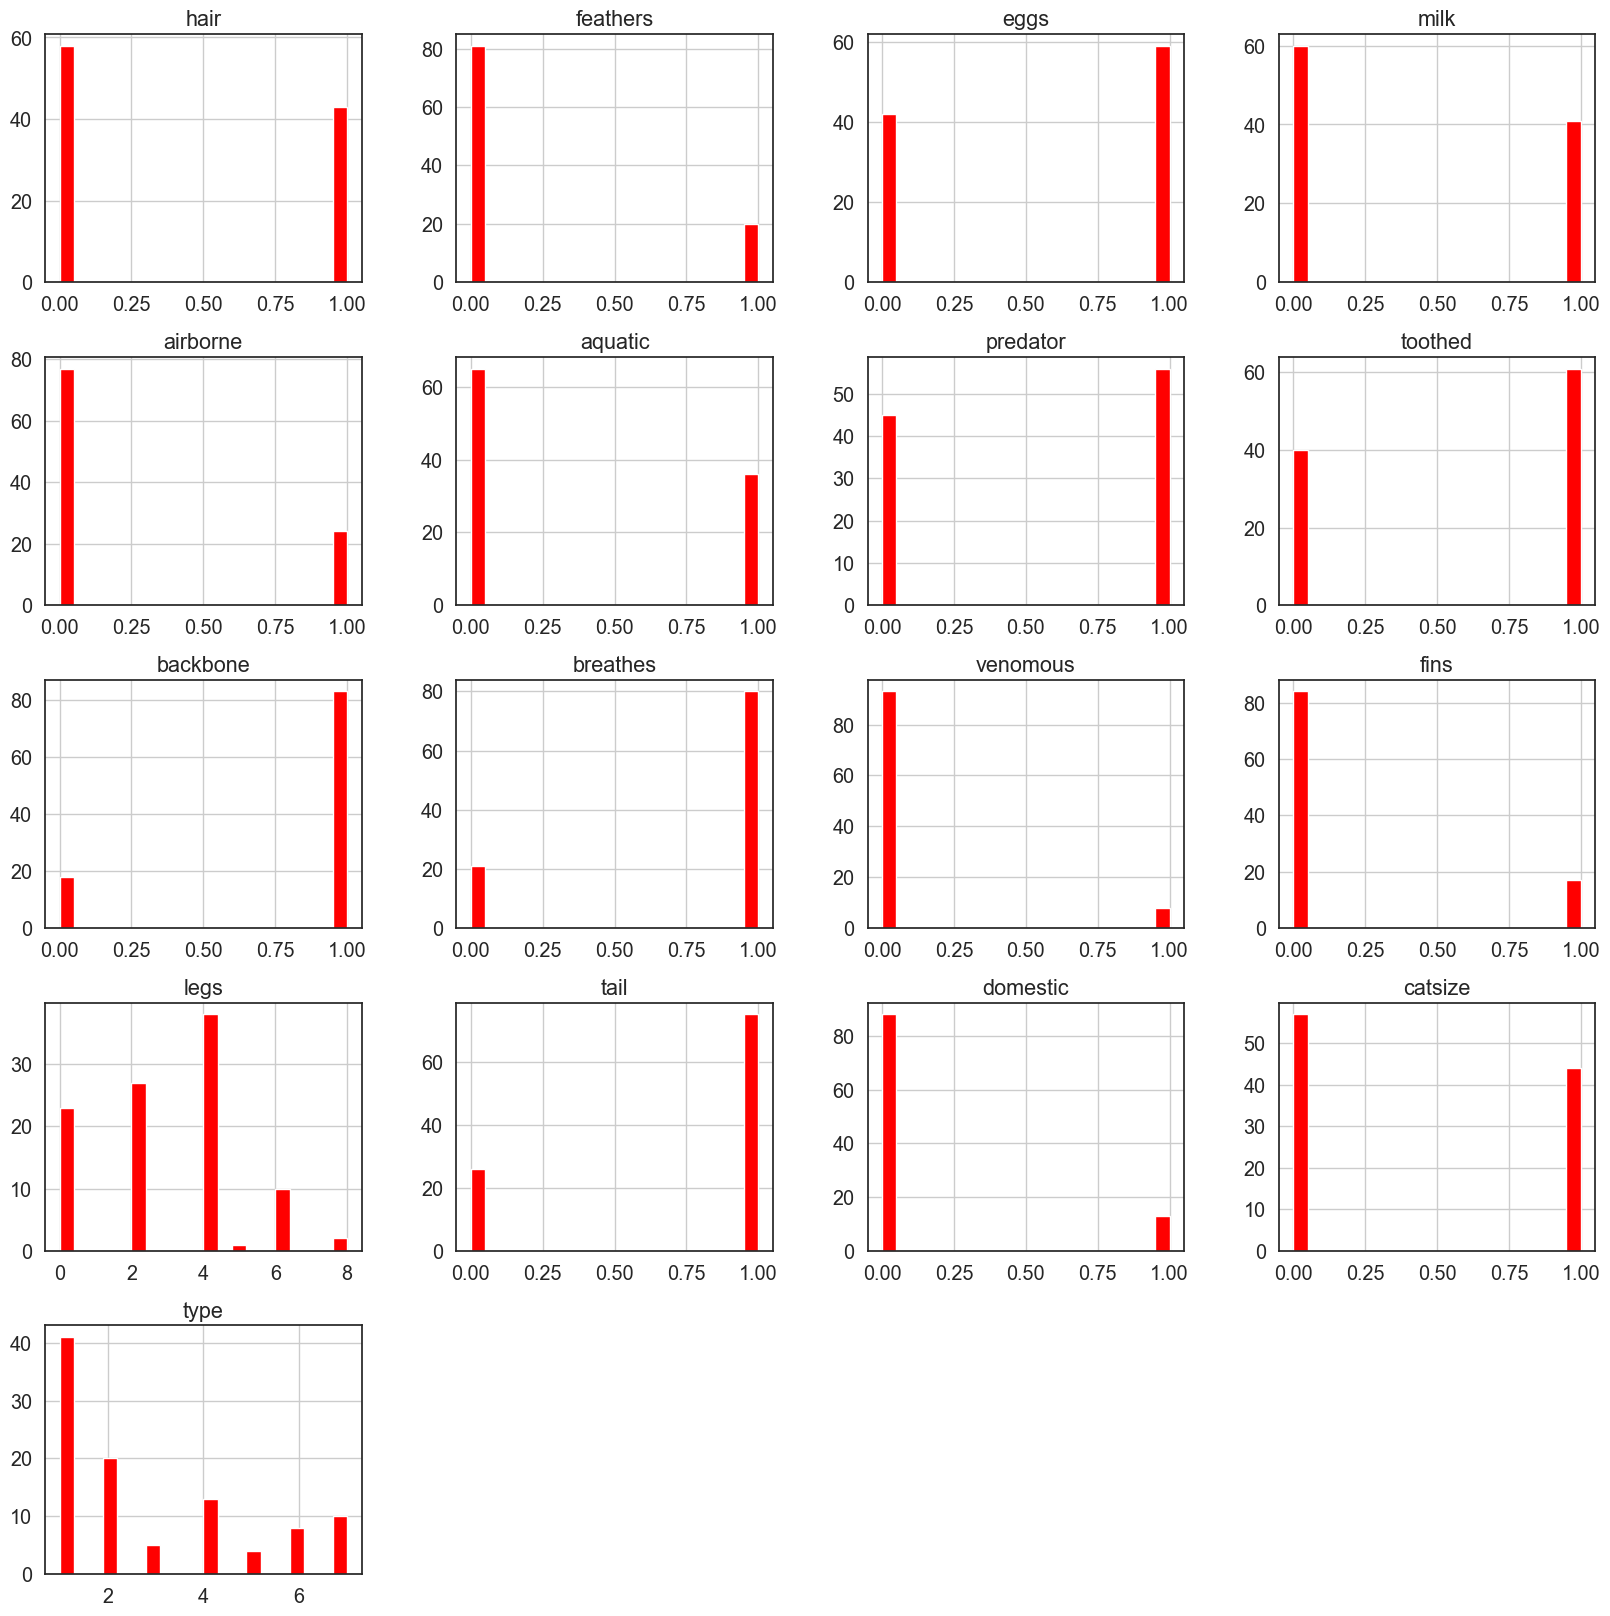

In [10]:
sns.set(style='white', font_scale=1.3, rc={'figure.figsize':(20,20)})
ax = df_zoo.hist(bins=20, color='red')

In [11]:
# Column names
df_zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [12]:
# Grabing the classes which I'll use later in graph in nodes
category_animals = [str(x) for x in sorted(df_zoo['type'].unique())]
category_animals

['1', '2', '3', '4', '5', '6', '7']

In [13]:
# Creating tuples in list for each category which allow to connect the root with each category
category_animals_edges = [('Animals', x) for x in category_animals]
category_animals_edges

[('Animals', '1'),
 ('Animals', '2'),
 ('Animals', '3'),
 ('Animals', '4'),
 ('Animals', '5'),
 ('Animals', '6'),
 ('Animals', '7')]

In [14]:
# Grabing the name of every species
species = [df_zoo['animal name'][df_zoo['type'] == x].tolist() for x in sorted(df_zoo['type'].unique())]

# Extracting lists of species for each category to one list
species = [j for i in species for j in i]

In [15]:
# Creating tuples for every animal and class which allow to connect the elements in graph
species_edge = []
for animal in species:
    for category in sorted(df_zoo['type'].unique()):
    # Taking every animal and checking it's class then appending it into list
        if animal in df_zoo['animal name'][df_zoo['type'] ==category].tolist():
            species_edge.append(tuple((str(category),animal)))
            
# The result of loop above
species_edge[0:5]

[('1', 'aardvark'),
 ('1', 'antelope'),
 ('1', 'bear'),
 ('1', 'boar'),
 ('1', 'buffalo')]

In [16]:
# Connecting the edges
edges_of_species=species_edge+category_animals_edges

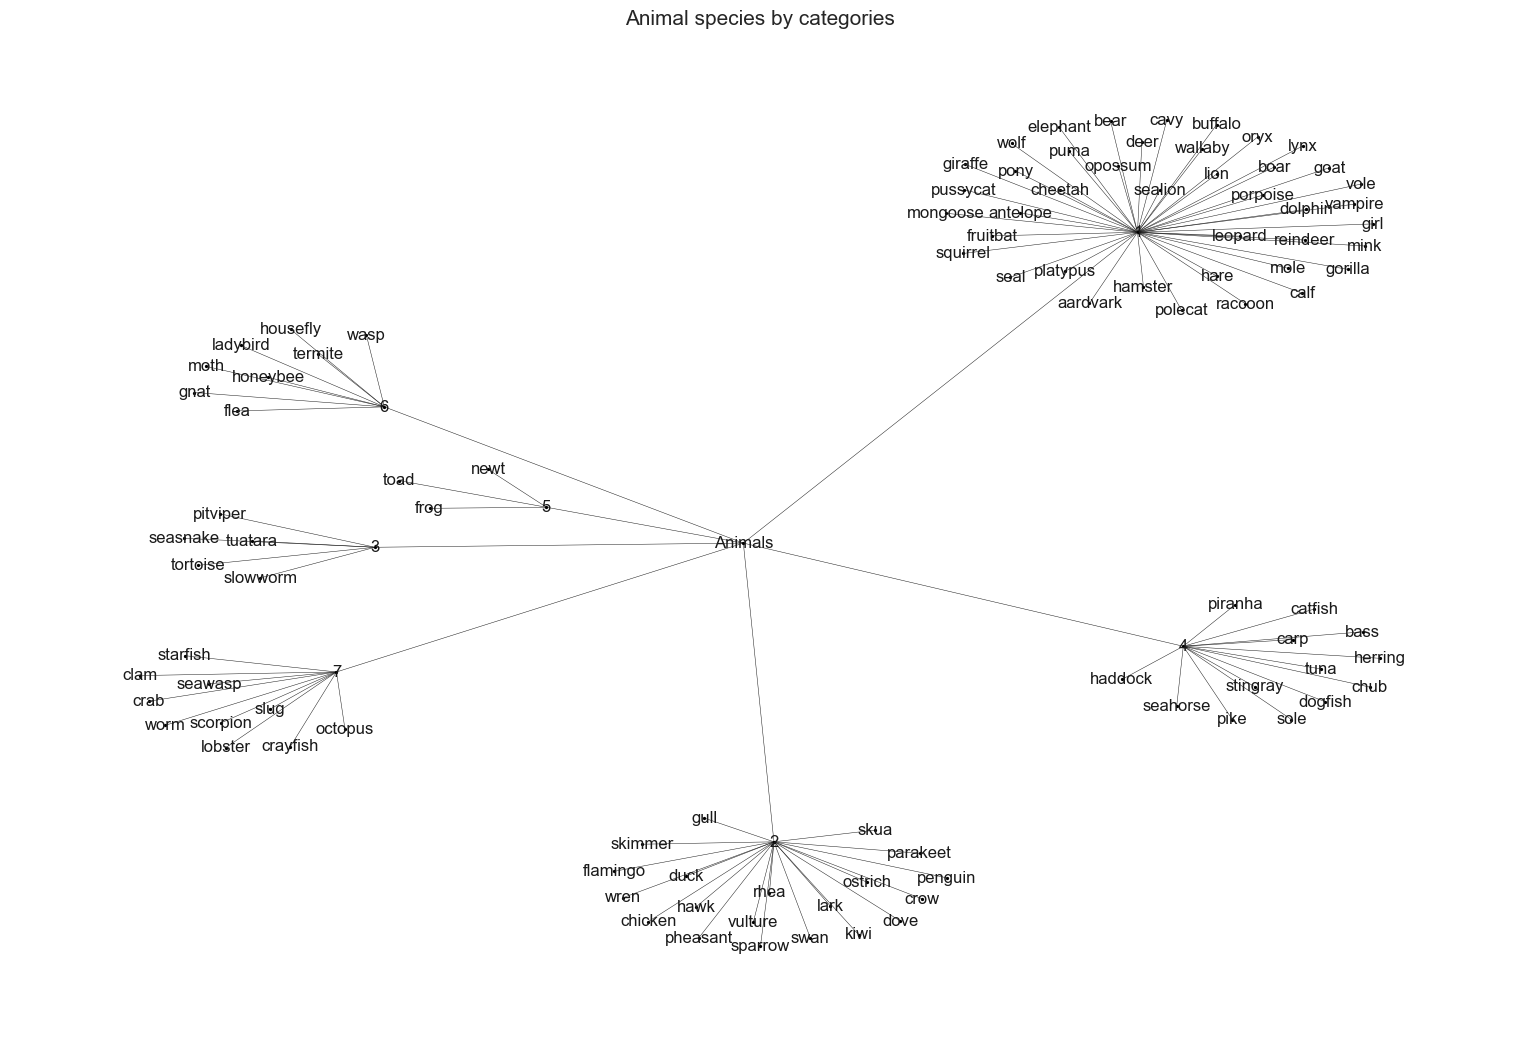

In [17]:
plt.figure(figsize=(15,10))
graph = nx.Graph()
# Creating root
graph.add_node("Animals")
# adding first node - (Animals > class number)
graph.add_nodes_from(category_animals)
# adding second node - (class number > animals)
graph.add_nodes_from(species)
# adding connections between nodes
graph.add_edges_from(edges_of_species)

options = {

    'node_color': 'black',
    'node_size': 1.8,
    'width': 0.35,

}

nx.draw(graph,with_labels = True,**options)
plt.title('Animal species by categories',size=15)
plt.show()

# KNN Model Building :

In [18]:
# "animal name" column setting as index column
df_zoo = df_zoo.set_index(['animal name'])
df_zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [19]:
# Creating independent & dependent variables
target = np.array(df_zoo.iloc[:,-1])
data = np.array(df_zoo.iloc[:,:-1])

In [20]:
# Dependent variable
target

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [21]:
# Independent variable
data

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [22]:
# Splitting dataset into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(data,target,test_size=0.25,stratify=target)

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)

prediction = knn.predict(X = xtest)
expected = ytest
confusion_matrix(y_true=expected, y_pred=prediction)

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [24]:
# Checking KNN score for training & testing data
print("KNN score for Trainning :", knn.score(xtrain,ytrain))
print("KNN score for Testing :", knn.score(xtest,ytest))

KNN score for Trainning : 1.0
KNN score for Testing : 0.9615384615384616


In [25]:
# roc_auc_score
knn_probs = knn.predict_proba(xtest)
knn_auc = roc_auc_score(ytest,knn_probs,multi_class='ovr')
print("KNN roc_auc_score :", knn_auc)

KNN roc_auc_score : 0.9257142857142858


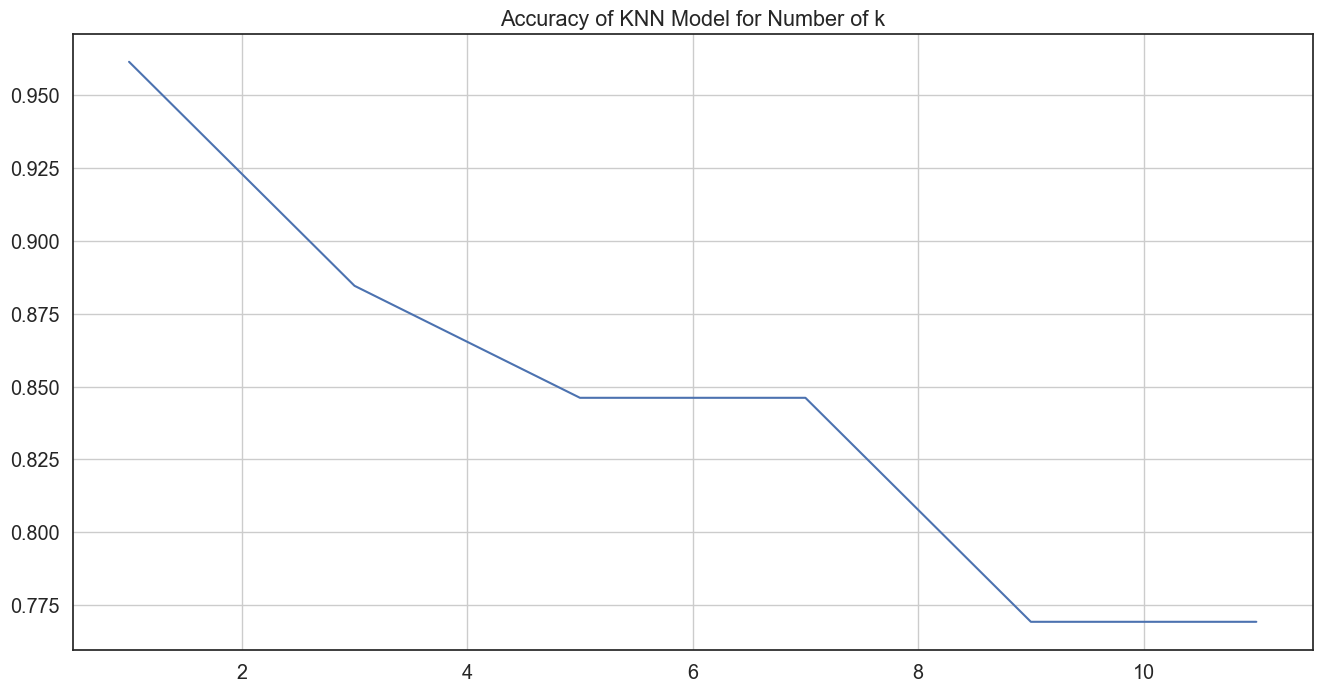

In [26]:
# Checking accuracy of knn model for number of k
fig,ax = plt.subplots(figsize=(16,8))
accuracy = []

for k in range(1,12,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    accuracy.append(knn.score(xtest,ytest))
sns.lineplot(x=range(1,12,2),y=accuracy,ax=ax)
ax.grid(zorder=2)
plt.title("Accuracy of KNN Model for Number of k")
plt.show()

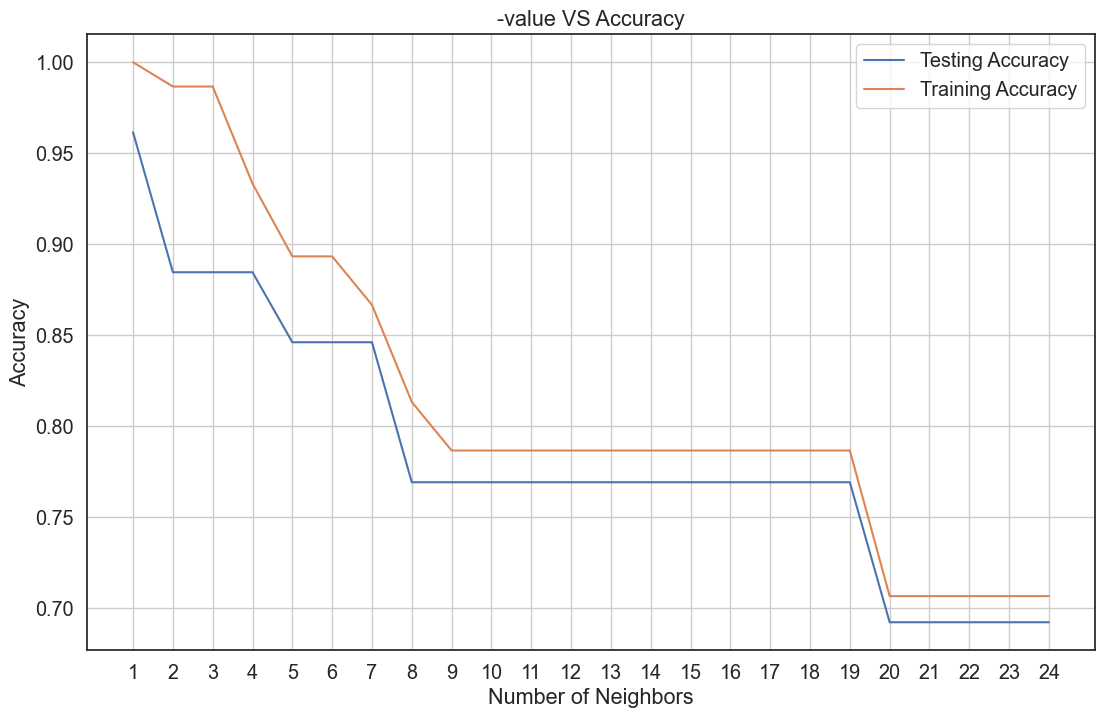

In [27]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    train_accuracy.append(knn.score(xtrain, ytrain))
    test_accuracy.append(knn.score(xtest, ytest))
    
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

# n_neighbors = 5 :

In [28]:
# Applying KNN algorithm
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(xtrain, ytrain)
y_pred_KNeighborsClassifier = knn.predict(xtest)

scores = []
cv_scores = []

score = accuracy_score(y_pred_KNeighborsClassifier,ytest)
scores.append(score)
print("Accuracy Score :", score)

Accuracy Score : 0.8461538461538461


# Changing n_neighbors values :

In [29]:
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='distance')
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

# Checking accuracy of training & testing data
print("Training Accuracy is :", knn.score(xtrain,ytrain))
print("Testing Accuracy is :", knn.score(xtest,ytest))

# Classification report
print("Classification Report :")
print(classification_report(ytest,ypred))

Training Accuracy is : 1.0
Testing Accuracy is : 0.8846153846153846
Classification Report :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         2
           7       1.00      0.33      0.50         3

    accuracy                           0.88        26
   macro avg       0.71      0.76      0.69        26
weighted avg       0.90      0.88      0.87        26



In [30]:
knn = KNeighborsClassifier(n_neighbors=2,algorithm='auto',weights='distance')
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

# Checking accuracy of training & testing data
print("Training Accuracy is :", knn.score(xtrain,ytrain))
print("Testing Accuracy is :", knn.score(xtest,ytest))

# Classification report
print("Classification Report :")
print(classification_report(ytest,ypred))

Training Accuracy is : 1.0
Testing Accuracy is : 0.9615384615384616
Classification Report :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.96        26
   macro avg       0.79      0.86      0.81        26
weighted avg       0.94      0.96      0.95        26



In [31]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

# Checking accuracy of training & testing data
print("Training Accuracy is :", knn.score(xtrain,ytrain))
print("Testing Accuracy is :", knn.score(xtest,ytest))

# Classification report
print("Classification Report :")
print(classification_report(ytest,ypred))

Training Accuracy is : 0.7866666666666666
Testing Accuracy is : 0.7692307692307693
Classification Report :
              precision    recall  f1-score   support

           1       0.83      0.91      0.87        11
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.60      1.00      0.75         3
           5       0.00      0.00      0.00         1
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         3

    accuracy                           0.77        26
   macro avg       0.42      0.56      0.47        26
weighted avg       0.65      0.77      0.70        26

